In [1]:
import pandas as pd

In [2]:
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
 
# Dataset is now stored in a Pandas Dataframe

recovered_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

# Dataset is now stored in a Pandas Dataframe

death_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
 
# Dataset is now stored in a Pandas Dataframe


In [3]:
def get_n_melt_data(data_url,case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={"variable":"Date","value":case_type},inplace=True)
    return melted_df

def merge_data(confirm_df,recovered_df,deaths_df):
	new_df = confirm_df.join(recovered_df['Recovered']).join(deaths_df['Deaths'])
	return new_df

In [4]:
confirm_df = get_n_melt_data(confirmed_cases_url,"Confirmed")
recovered_df = get_n_melt_data(recovered_cases_url,"Recovered")
deaths_df = get_n_melt_data(death_cases_url,"Deaths")

In [5]:
confirm_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
153724,NaN,Vietnam,14.058324,108.277199,7/25/21,101173
153725,NaN,West Bank and Gaza,31.952200,35.233200,7/25/21,316088
153726,NaN,Yemen,15.552727,48.516388,7/25/21,7012
153727,NaN,Zambia,-13.133897,27.849332,7/25/21,192071
153728,NaN,Zimbabwe,-19.015438,29.154857,7/25/21,97894


In [6]:
df = merge_data(confirm_df,recovered_df,deaths_df)

In [7]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0.0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0,0


In [8]:
df = df[['Country/Region','Date','Confirmed','Recovered','Deaths']]


In [9]:
df.tail()

,Country/Region,Date,Confirmed,Recovered,Deaths
153724,Vietnam,7/25/21,101173,NaN,370
153725,West Bank and Gaza,7/25/21,316088,NaN,3599
153726,Yemen,7/25/21,7012,NaN,1373
153727,Zambia,7/25/21,192071,NaN,3272
153728,Zimbabwe,7/25/21,97894,NaN,3094


In [10]:
df = df.groupby("Date")[['Confirmed','Recovered', 'Deaths']].sum()

In [11]:
df.tail()

,Confirmed,Recovered,Deaths
Date,,,
9/5/20,26923157,23751185.0,926013
9/6/20,27153660,21253664.0,930086
9/7/20,27371563,21910319.0,939681
9/8/20,27613624,26082314.0,944792
9/9/20,27898510,22366579.0,951068


In [12]:
df_per_day = df.groupby("Date")[['Confirmed','Recovered', 'Deaths']].sum()
df_per_day.tail()

,Confirmed,Recovered,Deaths
Date,,,
9/5/20,26923157,23751185.0,926013
9/6/20,27153660,21253664.0,930086
9/7/20,27371563,21910319.0,939681
9/8/20,27613624,26082314.0,944792
9/9/20,27898510,22366579.0,951068


<AxesSubplot:xlabel='Date'>

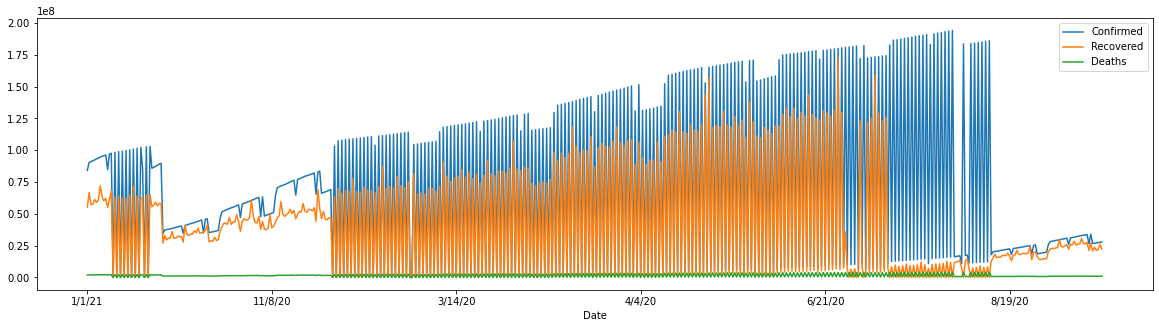

In [13]:
df_per_day.plot(kind='line',figsize=(20,5))


In [14]:
#Facebook Forecasting Library
import fbprophet

In [15]:
# Model Initialize
from fbprophet import Prophet
m = Prophet()

In [16]:
m.add_seasonality(name="monthly",period=30.5,fourier_order=5)

In [17]:
# Split Dataset
df

,Confirmed,Recovered,Deaths
Date,,,
1/1/21,84138651,55298168.0,1890690
1/10/21,90367145,66748239.0,1999142
1/11/21,90986669,57217362.0,2009489
1/12/21,91692474,57440195.0,2026774
1/13/21,92440744,61313025.0,2043625
...,...,...,...
9/5/20,26923157,23751185.0,926013
9/6/20,27153660,21253664.0,930086
9/7/20,27371563,21910319.0,939681


In [18]:
World_cases = df.reset_index()

In [19]:
World_cases.head()

,Date,Confirmed,Recovered,Deaths
0,1/1/21,84138651,55298168.0,1890690
1,1/10/21,90367145,66748239.0,1999142
2,1/11/21,90986669,57217362.0,2009489
3,1/12/21,91692474,57440195.0,2026774
4,1/13/21,92440744,61313025.0,2043625


In [20]:
World_cases.tail()

,Date,Confirmed,Recovered,Deaths
546,9/5/20,26923157,23751185.0,926013
547,9/6/20,27153660,21253664.0,930086
548,9/7/20,27371563,21910319.0,939681
549,9/8/20,27613624,26082314.0,944792
550,9/9/20,27898510,22366579.0,951068


In [21]:
confirmed_cases = World_cases[["Date","Confirmed"]]
recovered_cases = World_cases[["Date","Recovered"]]

In [22]:
confirmed_cases.shape

(551, 2)

In [23]:
confirmed_cases.rename(columns={"Date":"ds","Confirmed":"y"},inplace=True)

/Users/djiby/opt/anaconda3/envs/2021-4A-IABD-2_tf/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [24]:
train = confirmed_cases[:6]
test = confirmed_cases[6:]

In [25]:
train 

,ds,y
0,1/1/21,84138651
1,1/10/21,90367145
2,1/11/21,90986669
3,1/12/21,91692474
4,1/13/21,92440744
5,1/14/21,93195846


In [26]:
test

,ds,y
6,1/15/21,93963046
7,1/16/21,94602069
8,1/17/21,95131199
9,1/18/21,95646151
10,1/19/21,96254218
...,...,...
546,9/5/20,26923157
547,9/6/20,27153660
548,9/7/20,27371563
549,9/8/20,27613624


In [27]:
# Fit Model
m.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


In [28]:
# Future Date
future_dates = m.make_future_dataframe(periods=200)

In [29]:
future_dates


,ds
0,2021-01-01
1,2021-01-10
2,2021-01-11
3,2021-01-12
4,2021-01-13
...,...
201,2021-07-29
202,2021-07-30
203,2021-07-31
204,2021-08-01


In [30]:
# Prediction
prediction =  m.predict(future_dates)

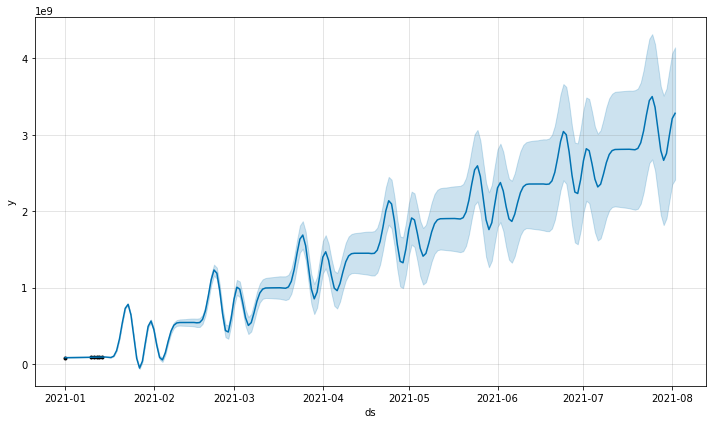

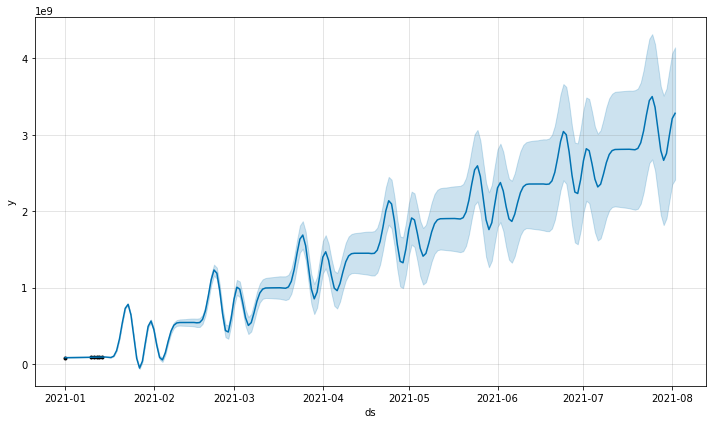

In [34]:
# Plot Prediction
m.plot(prediction)


In [ ]:
# Find Point/Dates For Change
from fbprophet.plot import add_changepoints_to_plot

In [ ]:
fig = m.plot(prediction)
c = add_changepoints_to_plot(fig.gca(),m,prediction)